In [277]:
import warnings
warnings.filterwarnings("ignore")

In [278]:
import pandas as pd

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
sub = pd.read_csv("../input/sample_submission.csv")

In [279]:
train.head(3)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091


In [280]:
test.head(3)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941


In [281]:
xtrain = train.drop(["target"], axis=1)
ytrain = train["target"]
xtest = test

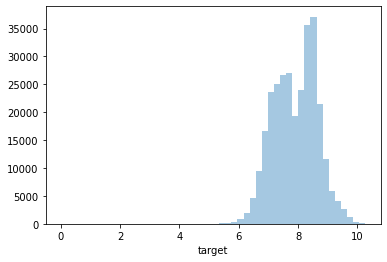

In [282]:
import seaborn as sns
sns.distplot(ytrain, kde=False);

<Figure size 432x288 with 0 Axes>

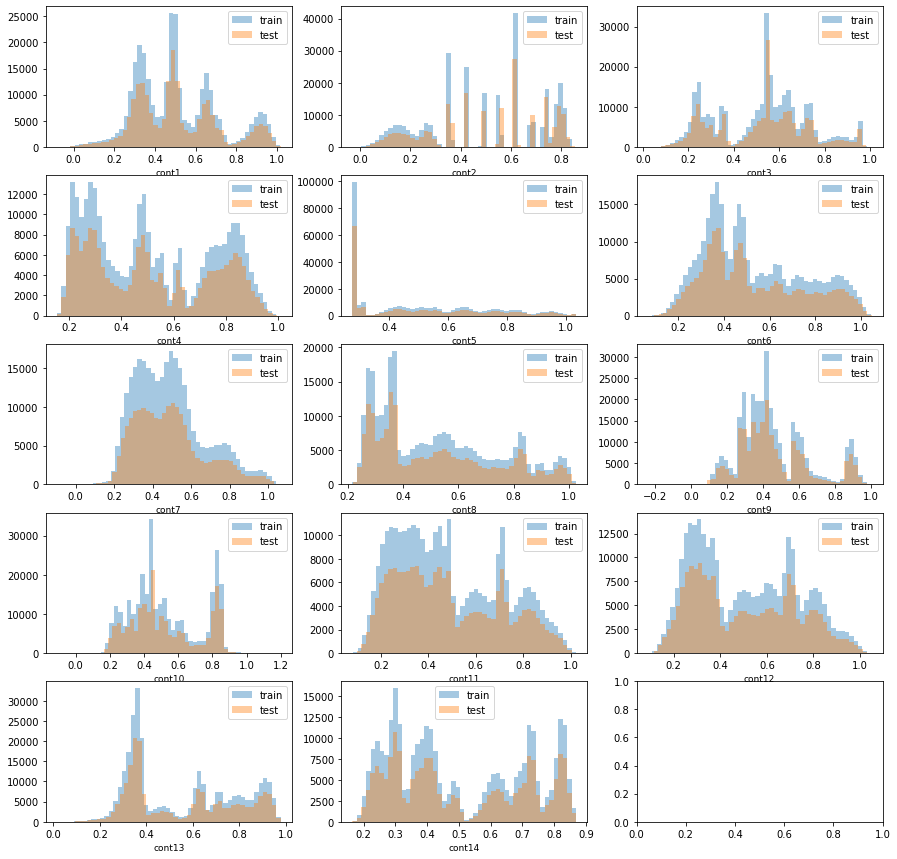

In [283]:
import matplotlib.pyplot as plt
features = [f for f in xtrain if f not in ("id")]

i = 1
plt.figure()
fig, ax = plt.subplots(5,3,figsize=(15,15))
for feat in features:
    plt.subplot(5,3,i)
    sns.distplot(train[feat], kde=False, label="train");
    sns.distplot(test[feat], kde=False, label="test");
    plt.xlabel(feat, fontsize=9);
    plt.legend();
    i += 1

In [284]:
corr = train.corr()
corr

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,1.000000,-0.001454,0.000574,0.001609,0.002131,0.001959,-0.001971,-0.000155,0.002112,0.000030,-0.001652,-0.000484,-0.002075,-0.000577,0.001940,0.001347
cont1,-0.001454,1.000000,-0.080170,-0.419712,0.273705,-0.059012,0.698556,0.341478,0.373340,0.794003,0.725040,0.565717,0.600041,0.570382,0.067294,-0.032994
cont2,0.000574,-0.080170,1.000000,0.334487,-0.005533,0.150737,0.023692,0.116222,0.081049,-0.046769,0.035101,0.126024,0.092642,0.017383,0.023972,0.067102
cont3,0.001609,-0.419712,0.334487,1.000000,-0.329131,0.060931,-0.300509,0.106904,-0.309783,-0.406743,-0.289756,-0.075415,-0.103735,-0.386521,-0.065457,0.058936
cont4,0.002131,0.273705,-0.005533,-0.329131,1.000000,0.123526,0.152752,-0.077045,0.324784,0.261927,0.204139,0.063961,0.073291,0.155226,0.054703,0.005522
cont5,0.001959,-0.059012,0.150737,0.060931,0.123526,1.000000,-0.179084,-0.241272,0.010438,-0.071764,-0.102531,-0.222244,-0.192571,-0.140272,0.040552,-0.005358
cont6,-0.001971,0.698556,0.023692,-0.300509,0.152752,-0.179084,1.000000,0.541975,0.415008,0.716613,0.770628,0.737495,0.757105,0.783604,0.067007,0.027955
cont7,-0.000155,0.341478,0.116222,0.106904,-0.077045,-0.241272,0.541975,1.000000,0.150403,0.341759,0.465418,0.672188,0.657310,0.322415,-0.037135,0.067234
cont8,0.002112,0.373340,0.081049,-0.309783,0.324784,0.010438,0.415008,0.150403,1.000000,0.429986,0.362336,0.296598,0.323042,0.475072,0.100645,0.014698
cont9,0.000030,0.794003,-0.046769,-0.406743,0.261927,-0.071764,0.716613,0.341759,0.429986,1.000000,0.725053,0.575095,0.605091,0.628391,0.081992,-0.013029


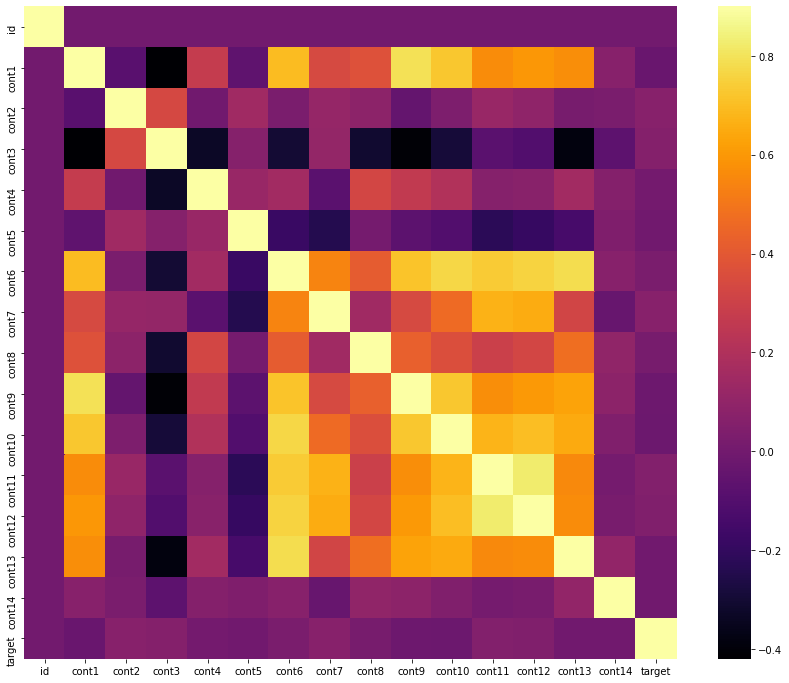

In [285]:
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="inferno", square=True);

0.4955, 0.7039
   id    target
0   0  7.998297
1   2  7.822960
2   6  7.898196
3   7  8.201669
4  10  8.271272


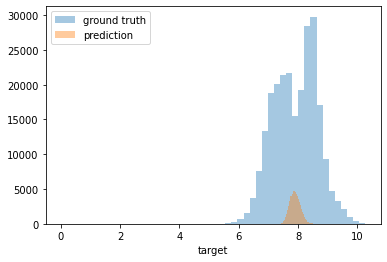

In [286]:
import lightgbm as lgb
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import shap

if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    sns.distplot(y_train, kde=False, label="ground truth");
    sns.distplot(preds, kde=False, label="prediction");
    plt.legend()
    
    #explainer = shap.Explainer(model, X_train)
    #shap_values = explainer.shap_values(X_train)
    #shap.summary_plot(shap_values, X_train)
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

In [287]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=2, random_state=42)
gmm.fit(train.target.values.reshape(-1,1))
train["target_class"] = gmm.predict(train.target.values.reshape(-1,1))

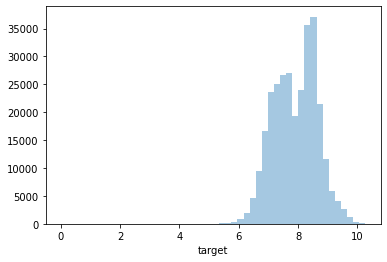

In [288]:
sns.distplot(train["target"], kde=False);

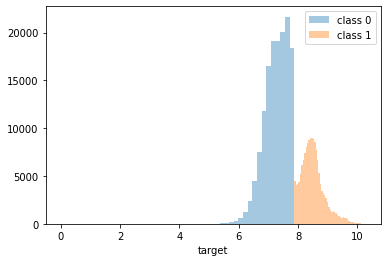

In [289]:
sns.distplot(train[train.target_class==0].target, kde=False, label="class 0");
sns.distplot(train[train.target_class==1].target, kde=False, label="class 1");
plt.legend()

In [290]:
def get_gmm_class_features(feat, n):
    gmm = mixture.GaussianMixture(n_components=n, random_state=42)
    gmm.fit(train[feat].values.reshape(-1,1))
    train[f"{feat}_class"] = gmm.predict(train[feat].values.reshape(-1,1))
    test[f"{feat}_class"] = gmm.predict(test[feat].values.reshape(-1,1))   

In [291]:
get_gmm_class_features("cont1", 4)
get_gmm_class_features("cont2", 10)
get_gmm_class_features("cont3", 6)
get_gmm_class_features("cont4", 4)
get_gmm_class_features("cont5", 3)
get_gmm_class_features("cont6", 2)
get_gmm_class_features("cont7", 3)
get_gmm_class_features("cont8", 4)
get_gmm_class_features("cont9", 4)
get_gmm_class_features("cont10", 8)
get_gmm_class_features("cont11", 5)
get_gmm_class_features("cont12", 4)
get_gmm_class_features("cont13", 6)
get_gmm_class_features("cont14", 6)

In [292]:
train.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target', 'target_class', 'cont1_class', 'cont2_class', 'cont3_class',
       'cont4_class', 'cont5_class', 'cont6_class', 'cont7_class',
       'cont8_class', 'cont9_class', 'cont10_class', 'cont11_class',
       'cont12_class', 'cont13_class', 'cont14_class'],
      dtype='object')

In [293]:
test.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'cont1_class', 'cont2_class', 'cont3_class', 'cont4_class',
       'cont5_class', 'cont6_class', 'cont7_class', 'cont8_class',
       'cont9_class', 'cont10_class', 'cont11_class', 'cont12_class',
       'cont13_class', 'cont14_class'],
      dtype='object')

In [294]:
xtrain = train.drop(["target", "target_class"], axis=1)
ytrain = train["target"]
xtest = test

0.4959, 0.7042
   id    target
0   0  7.978238
1   2  7.809439
2   6  7.915454
3   7  8.207063
4  10  8.268744


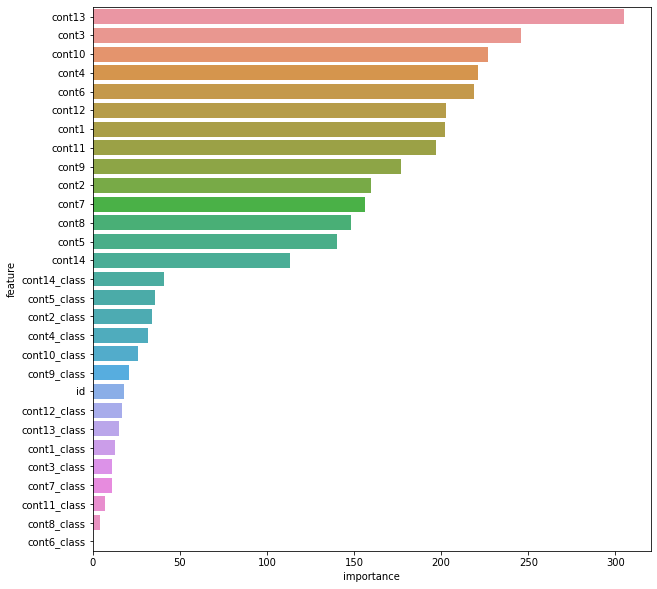

In [295]:
if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance = importance.sort_values(by=["importance"], ascending=False)
    
    plt.figure(figsize=(10,10))
    sns.barplot(data=importance, x="importance", y="feature");
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

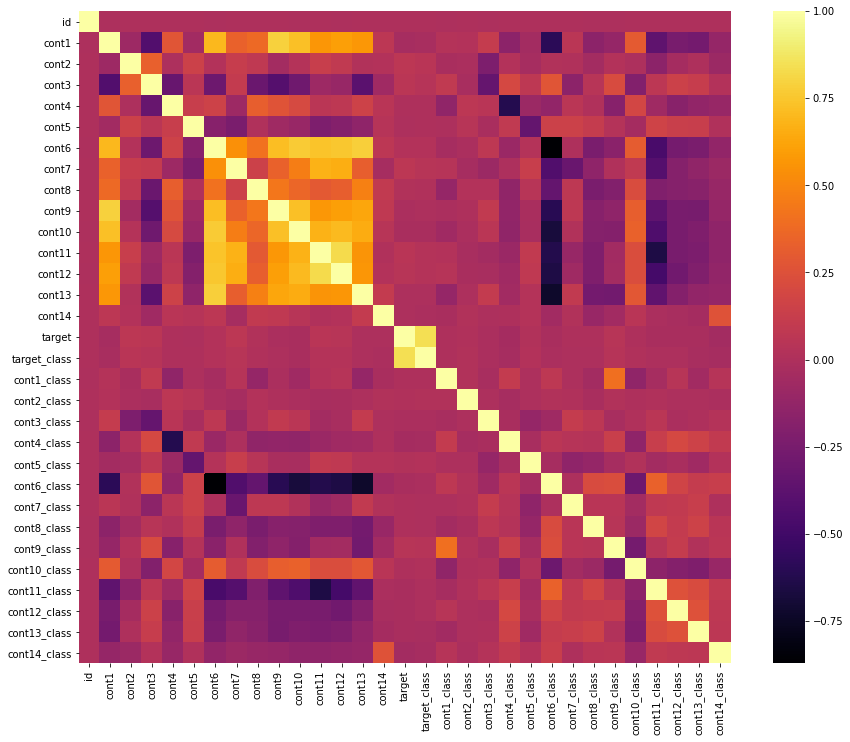

In [296]:
corr = train.corr()

plt.subplots(figsize=(15,12))
sns.heatmap(corr, cmap="inferno", square=True);

In [297]:
import numpy as np

a = np.arange(9).reshape((3, 3))
print(a)
print("-"*10)
print(np.where(a < 4, -1, 100))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
----------
[[ -1  -1  -1]
 [ -1 100 100]
 [100 100 100]]


In [298]:
for j in range(1,15):
    for i in range(train.cont1_class.nunique()):
        train[f"cont{j}_class_{i+1}"] = np.where(
            train[f"cont{j}_class"]==(i+1),
            train[f"cont{j}"],
            np.nan,
        )
        test[f"cont{j}_class_{i+1}"] = np.where(
            test[f"cont{j}_class"]==(i+1),
            test[f"cont{j}"],
            np.nan,
        )

In [299]:
train.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target', 'target_class', 'cont1_class', 'cont2_class', 'cont3_class',
       'cont4_class', 'cont5_class', 'cont6_class', 'cont7_class',
       'cont8_class', 'cont9_class', 'cont10_class', 'cont11_class',
       'cont12_class', 'cont13_class', 'cont14_class', 'cont1_class_1',
       'cont1_class_2', 'cont1_class_3', 'cont1_class_4', 'cont2_class_1',
       'cont2_class_2', 'cont2_class_3', 'cont2_class_4', 'cont3_class_1',
       'cont3_class_2', 'cont3_class_3', 'cont3_class_4', 'cont4_class_1',
       'cont4_class_2', 'cont4_class_3', 'cont4_class_4', 'cont5_class_1',
       'cont5_class_2', 'cont5_class_3', 'cont5_class_4', 'cont6_class_1',
       'cont6_class_2', 'cont6_class_3', 'cont6_class_4', 'cont7_class_1',
       'cont7_class_2', 'cont7_class_3', 'cont7_class_4', 'cont8_class_1',
       'cont8_class_2', 'cont8_class_3

In [300]:
test.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'cont1_class', 'cont2_class', 'cont3_class', 'cont4_class',
       'cont5_class', 'cont6_class', 'cont7_class', 'cont8_class',
       'cont9_class', 'cont10_class', 'cont11_class', 'cont12_class',
       'cont13_class', 'cont14_class', 'cont1_class_1', 'cont1_class_2',
       'cont1_class_3', 'cont1_class_4', 'cont2_class_1', 'cont2_class_2',
       'cont2_class_3', 'cont2_class_4', 'cont3_class_1', 'cont3_class_2',
       'cont3_class_3', 'cont3_class_4', 'cont4_class_1', 'cont4_class_2',
       'cont4_class_3', 'cont4_class_4', 'cont5_class_1', 'cont5_class_2',
       'cont5_class_3', 'cont5_class_4', 'cont6_class_1', 'cont6_class_2',
       'cont6_class_3', 'cont6_class_4', 'cont7_class_1', 'cont7_class_2',
       'cont7_class_3', 'cont7_class_4', 'cont8_class_1', 'cont8_class_2',
       'cont8_class_3', 'cont8_class_4', 'cont9

0.4951, 0.7036
   id    target
0   0  7.971712
1   2  7.885142
2   6  7.900084
3   7  8.209854
4  10  8.207324


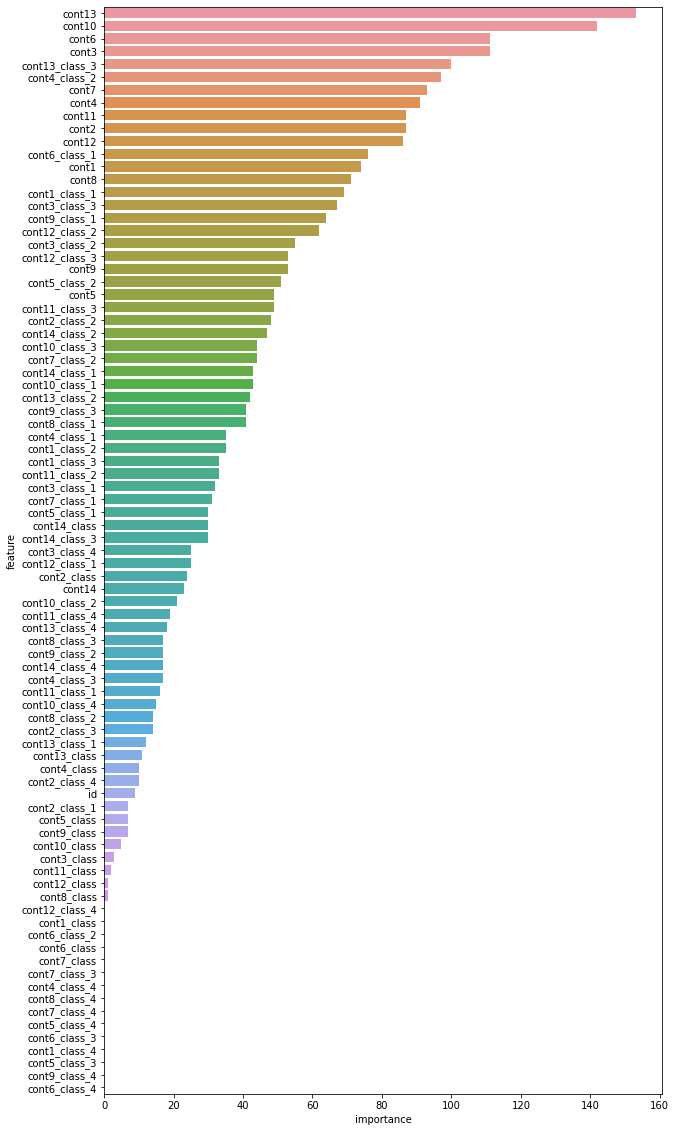

In [301]:
xtrain = train.drop(["target", "target_class"], axis=1)
ytrain = train["target"]
xtest = test

if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance = importance.sort_values(by=["importance"], ascending=False)
    
    plt.figure(figsize=(10,20))
    sns.barplot(data=importance, x="importance", y="feature");
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

In [302]:
for i in range(1,15):
    train[f"cont{i}_bin_10"] = pd.cut(
        train[f"cont{1}"],
        bins=10,
        labels=False,
    )
    test[f"cont{i}_bin_10"] = pd.cut(
        test[f"cont{1}"],
        bins=10,
        labels=False,
    )

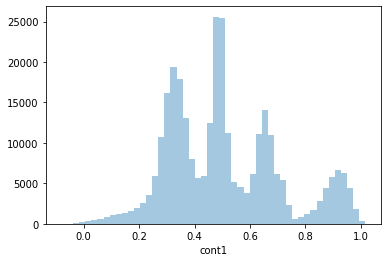

In [303]:
sns.distplot(train["cont1"], kde=False);

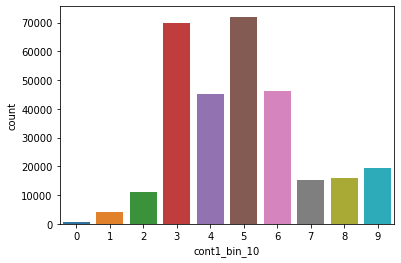

In [304]:
sns.countplot(train["cont1_bin_10"]);

In [305]:
train = train.drop([
    'cont1_class', 
    'cont2_class', 
    'cont3_class',
    'cont4_class', 
    'cont5_class', 
    'cont6_class', 
    'cont7_class',
    'cont8_class', 
    'cont9_class', 
    'cont10_class', 
    'cont11_class',
    'cont12_class', 
    'cont13_class', 
    'cont14_class', 
    'cont1_class_1',
    'cont1_class_2', 
    'cont1_class_3', 
    'cont1_class_4', 
    'cont2_class_1',
    'cont2_class_2', 
    'cont2_class_3', 
    'cont2_class_4', 
    'cont3_class_1',
    'cont3_class_2', 
    'cont3_class_3', 
    'cont3_class_4', 
    'cont4_class_1',
    'cont4_class_2', 
    'cont4_class_3', 
    'cont4_class_4', 
    'cont5_class_1',
    'cont5_class_2',
    'cont5_class_3', 
    'cont5_class_4', 
    'cont6_class_1',
    'cont6_class_2', 
    'cont6_class_3', 
    'cont6_class_4', 
    'cont7_class_1',
    'cont7_class_2', 
    'cont7_class_3',
    'cont7_class_4', 
    'cont8_class_1',
    'cont8_class_2', 
    'cont8_class_3', 
    'cont8_class_4', 
    'cont9_class_1',
    'cont9_class_2', 
    'cont9_class_3', 
    'cont9_class_4', 
    'cont10_class_1',
    'cont10_class_2', 
    'cont10_class_3', 
    'cont10_class_4', 
    'cont11_class_1',
    'cont11_class_2', 
    'cont11_class_3', 
    'cont11_class_4', 
    'cont12_class_1',
    'cont12_class_2', 
    'cont12_class_3', 
    'cont12_class_4', 
    'cont13_class_1',
    'cont13_class_2', 
    'cont13_class_3', 
    'cont13_class_4', 
    'cont14_class_1',
    'cont14_class_2', 
    'cont14_class_3', 
    'cont14_class_4',
], axis=1)

train.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target', 'target_class', 'cont1_bin_10', 'cont2_bin_10',
       'cont3_bin_10', 'cont4_bin_10', 'cont5_bin_10', 'cont6_bin_10',
       'cont7_bin_10', 'cont8_bin_10', 'cont9_bin_10', 'cont10_bin_10',
       'cont11_bin_10', 'cont12_bin_10', 'cont13_bin_10', 'cont14_bin_10'],
      dtype='object')

In [306]:
test = test.drop([
    'cont1_class', 
    'cont2_class', 
    'cont3_class',
    'cont4_class', 
    'cont5_class', 
    'cont6_class', 
    'cont7_class',
    'cont8_class', 
    'cont9_class', 
    'cont10_class', 
    'cont11_class',
    'cont12_class', 
    'cont13_class', 
    'cont14_class', 
    'cont1_class_1',
    'cont1_class_2', 
    'cont1_class_3', 
    'cont1_class_4', 
    'cont2_class_1',
    'cont2_class_2', 
    'cont2_class_3', 
    'cont2_class_4', 
    'cont3_class_1',
    'cont3_class_2', 
    'cont3_class_3', 
    'cont3_class_4', 
    'cont4_class_1',
    'cont4_class_2', 
    'cont4_class_3', 
    'cont4_class_4', 
    'cont5_class_1',
    'cont5_class_2',
    'cont5_class_3', 
    'cont5_class_4', 
    'cont6_class_1',
    'cont6_class_2', 
    'cont6_class_3', 
    'cont6_class_4', 
    'cont7_class_1',
    'cont7_class_2', 
    'cont7_class_3',
    'cont7_class_4', 
    'cont8_class_1',
    'cont8_class_2', 
    'cont8_class_3', 
    'cont8_class_4', 
    'cont9_class_1',
    'cont9_class_2', 
    'cont9_class_3', 
    'cont9_class_4', 
    'cont10_class_1',
    'cont10_class_2', 
    'cont10_class_3', 
    'cont10_class_4', 
    'cont11_class_1',
    'cont11_class_2', 
    'cont11_class_3', 
    'cont11_class_4', 
    'cont12_class_1',
    'cont12_class_2', 
    'cont12_class_3', 
    'cont12_class_4', 
    'cont13_class_1',
    'cont13_class_2', 
    'cont13_class_3', 
    'cont13_class_4', 
    'cont14_class_1',
    'cont14_class_2', 
    'cont14_class_3', 
    'cont14_class_4',
], axis=1)

test.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'cont1_bin_10', 'cont2_bin_10', 'cont3_bin_10', 'cont4_bin_10',
       'cont5_bin_10', 'cont6_bin_10', 'cont7_bin_10', 'cont8_bin_10',
       'cont9_bin_10', 'cont10_bin_10', 'cont11_bin_10', 'cont12_bin_10',
       'cont13_bin_10', 'cont14_bin_10'],
      dtype='object')

0.4921, 0.7015
   id    target
0   0  7.931328
1   2  7.815348
2   6  7.886071
3   7  8.157758
4  10  8.247204


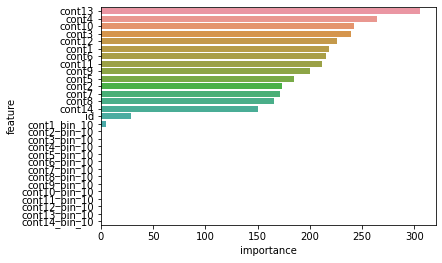

In [307]:
xtrain = train.drop(["target", "target_class"], axis=1)
ytrain = train["target"]
xtest = test

if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance = importance.sort_values(by=["importance"], ascending=False)
    
    sns.barplot(data=importance, x="importance", y="feature");
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

In [308]:
train = train.drop([
    'cont1_bin_10', 
    'cont2_bin_10',
    'cont3_bin_10', 
    'cont4_bin_10', 
    'cont5_bin_10', 
    'cont6_bin_10',
    'cont7_bin_10', 
    'cont8_bin_10', 
    'cont9_bin_10', 
    'cont10_bin_10',
    'cont11_bin_10', 
    'cont12_bin_10', 
    'cont13_bin_10', 
    'cont14_bin_10',
], axis=1)

train.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target', 'target_class'],
      dtype='object')

In [309]:
test = test.drop([
    'cont1_bin_10', 
    'cont2_bin_10',
    'cont3_bin_10', 
    'cont4_bin_10', 
    'cont5_bin_10', 
    'cont6_bin_10',
    'cont7_bin_10', 
    'cont8_bin_10', 
    'cont9_bin_10', 
    'cont10_bin_10',
    'cont11_bin_10', 
    'cont12_bin_10', 
    'cont13_bin_10', 
    'cont14_bin_10',
], axis=1)

test.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

In [310]:
features = [f for f in train.columns if f not in ("id", "target", "target_class")]

train["sum"] = train[features].sum(axis=1)
train["mean"] = train[features].mean(axis=1)
train["min"] = train[features].min(axis=1)
train["max"] = train[features].max(axis=1)
train["std"] = train[features].std(axis=1)
train["var"] = train[features].var(axis=1)

test["sum"] = test[features].sum(axis=1)
test["mean"] = test[features].mean(axis=1)
test["min"] = test[features].min(axis=1)
test["max"] = test[features].max(axis=1)
test["std"] = test[features].std(axis=1)
test["var"] = test[features].var(axis=1)

0.4931, 0.7022
   id    target
0   0  7.998527
1   2  7.852333
2   6  7.875207
3   7  8.182577
4  10  8.256496


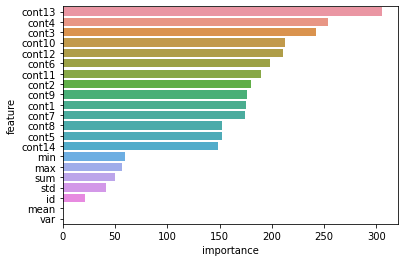

In [311]:
xtrain = train.drop(["target", "target_class"], axis=1)
ytrain = train["target"]
xtest = test

if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance = importance.sort_values(by=["importance"], ascending=False)
    
    sns.barplot(data=importance, x="importance", y="feature");
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

In [312]:
train = train.drop([
    'sum', 
    'mean', 
    'min', 
    'max', 
    'std', 
    'var',
], axis=1)

train.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target', 'target_class'],
      dtype='object')

In [313]:
test = test.drop([
    'sum', 
    'mean', 
    'min', 
    'max', 
    'std', 
    'var',
], axis=1)

test.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

In [315]:
import featuretools as ft

ent_set = ft.EntitySet(id="data")
cols = [
    'id', 
    'cont1', 
    'cont2', 
    'cont3', 
    'cont4', 
    'cont5', 
    'cont6', 
    'cont7',
    'cont8', 
    'cont9', 
    'cont10', 
    'cont11', 
    'cont12', 
    'cont13', 
    'cont14',
]

ent_set = ent_set.entity_from_dataframe(
    entity_id="data",
    dataframe=pd.concat([train, test], axis=0)[cols],
    index="id",
    time_index=None,
)

ent_set["data"]

Entity: data
  Variables:
    id (dtype: index)
    cont1 (dtype: numeric)
    cont2 (dtype: numeric)
    cont3 (dtype: numeric)
    cont4 (dtype: numeric)
    cont5 (dtype: numeric)
    cont6 (dtype: numeric)
    cont7 (dtype: numeric)
    cont8 (dtype: numeric)
    cont9 (dtype: numeric)
    cont10 (dtype: numeric)
    cont11 (dtype: numeric)
    cont12 (dtype: numeric)
    cont13 (dtype: numeric)
    cont14 (dtype: numeric)
  Shape:
    (Rows: 500000, Columns: 15)

In [316]:
ft.list_primitives().head()

,name,type,dask_compatible,koalas_compatible,description
0,first,aggregation,False,False,Determines the first value in a list.
1,trend,aggregation,False,False,Calculates the trend of a variable over time.
2,entropy,aggregation,False,False,Calculates the entropy for a categorical variable
3,skew,aggregation,False,False,Computes the extent to which a distribution di...
4,time_since_last,aggregation,False,False,Calculates the time elapsed since the last dat...


In [317]:
new_features, new_feature_names = ft.dfs(
    entityset=ent_set,
    target_entity="data",
    trans_primitives=["divide_numeric"],
)
new_features.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cont9 / cont12,cont9 / cont13,cont9 / cont14,cont9 / cont2,cont9 / cont3,cont9 / cont4,cont9 / cont5,cont9 / cont6,cont9 / cont7,cont9 / cont8
id,,,,,,,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,...,0.644051,0.635285,1.827848,0.688088,0.866883,1.913166,1.964841,0.652192,0.626749,1.955037
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,...,0.961755,1.130765,1.132214,0.673534,0.609727,0.834752,0.649801,0.930037,0.818942,0.720338
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,...,0.867045,0.665509,1.938983,2.583594,1.948391,2.002680,0.968301,0.708660,1.160942,1.051599
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,...,0.702159,0.628325,2.055132,3.586938,1.050429,0.791162,2.033914,0.731704,0.763148,0.697789
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,...,0.971342,0.934546,2.007145,2.076413,2.879052,0.993688,1.314070,1.053640,1.795597,1.447733


In [318]:
new_features = new_features.reset_index(drop=False)
train_nf = new_features[new_features.id.isin(train.id)]
test_nf = new_features[new_features.id.isin(test.id)]

0.4931, 0.7022
        id    target
300000   0  8.046510
300001   2  7.812421
300002   6  7.943981
300003   7  8.167526
300004  10  8.207598


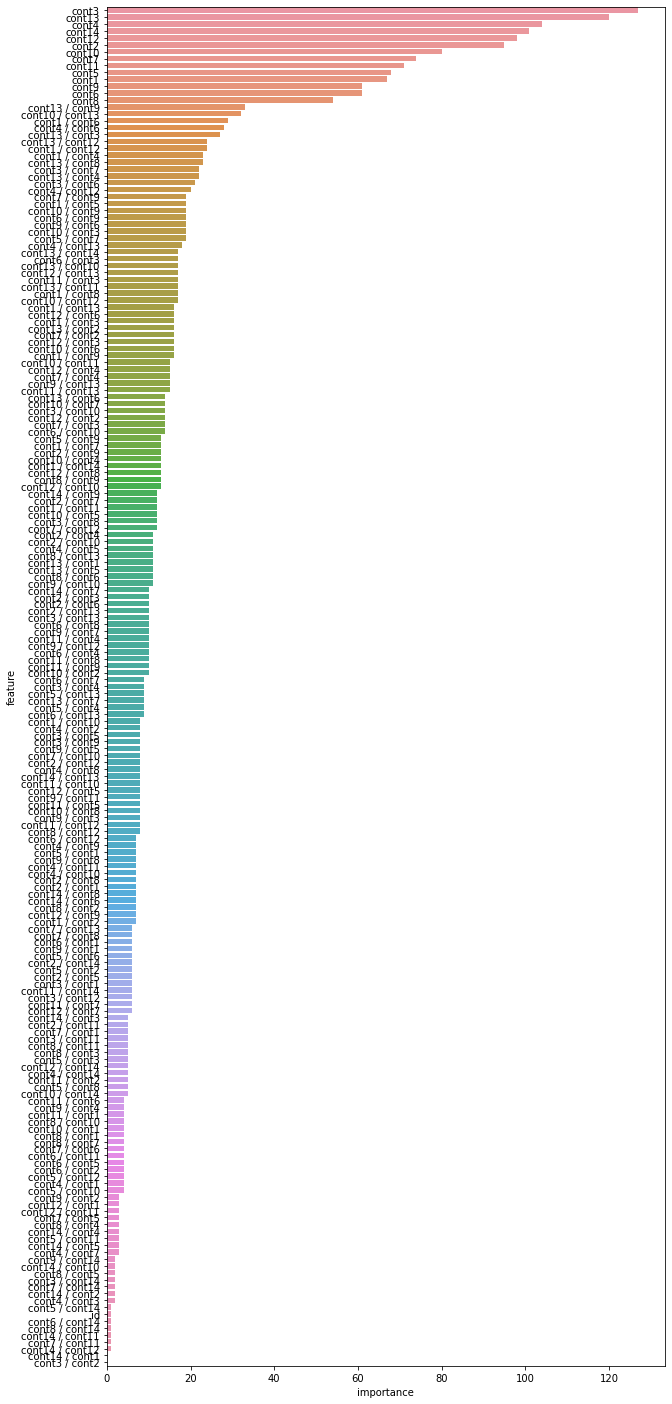

In [324]:
xtrain = train_nf
ytrain = train["target"]
xtest = test_nf

if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance = importance.sort_values(by=["importance"], ascending=False)
    
    plt.figure(figsize=(10,25))
    sns.barplot(data=importance, x="importance", y="feature");
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

In [326]:
new_features, new_feature_names = ft.dfs(
    entityset=ent_set,
    target_entity="data",
    trans_primitives=["multiply_numeric"],
)
new_features.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cont5 * cont6,cont5 * cont7,cont5 * cont8,cont5 * cont9,cont6 * cont7,cont6 * cont8,cont6 * cont9,cont7 * cont8,cont7 * cont9,cont8 * cont9
id,,,,,,,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,...,0.243191,0.253063,0.081127,0.158607,0.762398,0.244411,0.477832,0.254332,0.497229,0.159403
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,...,0.289580,0.328863,0.373880,0.269320,0.229771,0.261223,0.188169,0.296660,0.213695,0.242947
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,...,0.503176,0.307148,0.339084,0.356581,0.419682,0.463319,0.487226,0.282818,0.297412,0.328336
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,...,0.221749,0.212612,0.232527,0.162254,0.590996,0.646353,0.451018,0.619721,0.432434,0.472939
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,...,0.552543,0.324227,0.402133,0.582182,0.404367,0.501529,0.726081,0.294293,0.426057,0.528431


In [327]:
new_features = new_features.reset_index(drop=False)
train_nf = new_features[new_features.id.isin(train.id)]
test_nf = new_features[new_features.id.isin(test.id)]

0.4933, 0.7024
        id    target
300000   0  7.999011
300001   2  7.832830
300002   6  7.896160
300003   7  8.187508
300004  10  8.249221


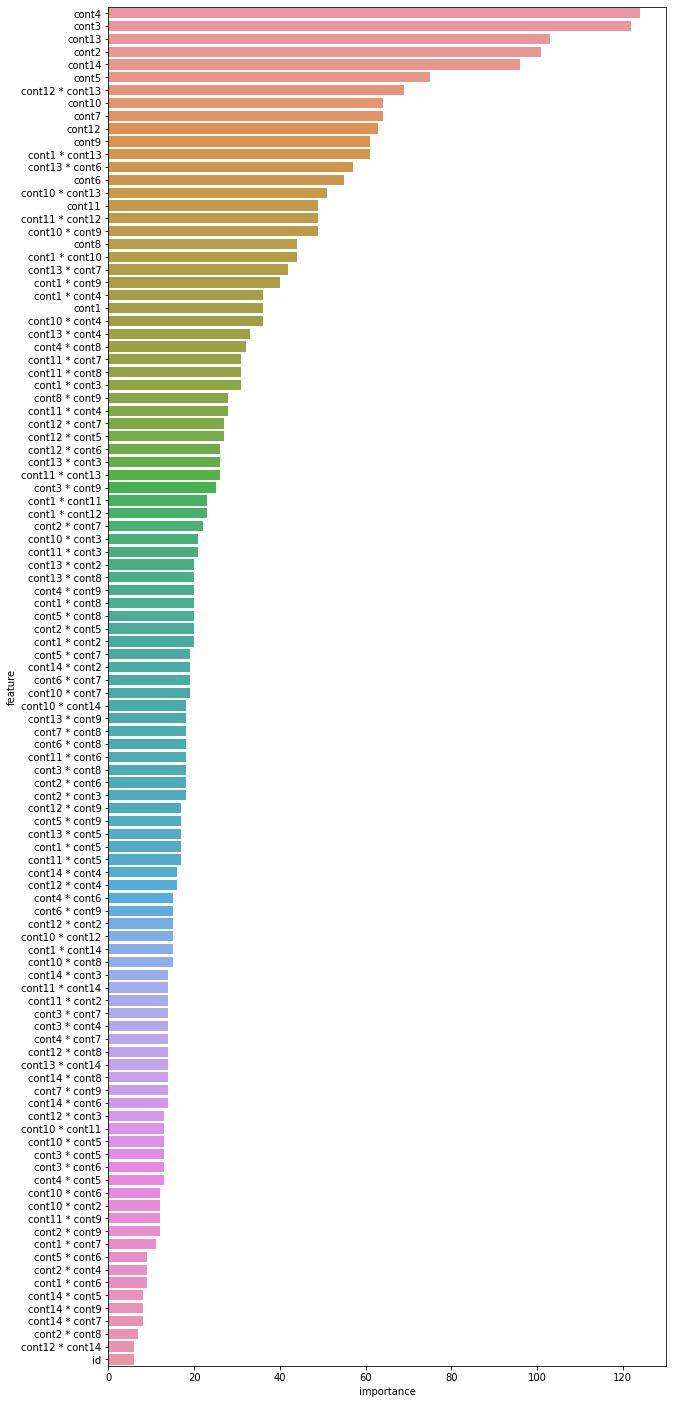

In [328]:
xtrain = train_nf
ytrain = train["target"]
xtest = test_nf

if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance = importance.sort_values(by=["importance"], ascending=False)
    
    plt.figure(figsize=(10,25))
    sns.barplot(data=importance, x="importance", y="feature");
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

In [ ]:
### end of code ###